## **Setup the environment**

In [1]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'


--2025-04-26 17:02:19--  https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
Resolving www.lancaster.ac.uk (www.lancaster.ac.uk)... 148.88.65.80, 2001:630:80:2ff::80:1
Connecting to www.lancaster.ac.uk (www.lancaster.ac.uk)|148.88.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112640 (110K) [application/x-gzip]
Saving to: ‘lorasim-20170710.tgz.1’

lorasim-20170710.tg 100%[===================>] 110.00K   298KB/s    in 0.4s    

2025-04-26 17:02:20 (298 KB/s) - ‘lorasim-20170710.tgz.1’ saved [112640/112640]

lorasim/
lorasim/loraDir.py
lorasim/loraDirMulBS.py
lorasim/oneDirectionalLoraIntf.py
lorasim/requirements.txt
lorasim/directionalLoraIntf.py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python2 is already the newest version (2.7.18-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
          

In [2]:
import os
import pandas as pd
import math

**Simulation Functions**




In [3]:
import subprocess

def simulate_figure_5(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

def simulate_figure_7(n_nodes, tx_rate, exp, duration, n_sinks, collisions):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(n_sinks)),
            str(int(collisions),)
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

# Der in aloha defined as S/G = e^(-2G)
def aloha_der(n_nodes,t):
    rate = 1e-6
    return math.exp(-2 * n_nodes * rate * t)


**Simulate Figure 5**

In [12]:
duration = 86400000
tx_rate = 1e6

nodes = (
    list(range(1,10)) +
    list(range(10,300,10)) +
    list(range(300,1000,100)) +
    list(range(1000, 1601, 100))
)

# simulate figure 5
for n_nodes in nodes:
  print(f"Simulating {n_nodes} nodes")
  simulate_figure_5(n_nodes=n_nodes, tx_rate=tx_rate, exp=4, duration=duration)
  simulate_figure_5(n_nodes=n_nodes, tx_rate=tx_rate, exp=3, duration=duration)
  simulate_figure_5(n_nodes=n_nodes, tx_rate=tx_rate, exp=5, duration=duration)


Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1100 nodes
Simulating 1200 nodes
Simulating 1300 

In [13]:
data3 = pd.read_csv("exp3.dat", sep=" ")
data4 = pd.read_csv("exp4.dat", sep=" ")
data5 = pd.read_csv("exp5.dat", sep=" ")


In [14]:
# compute DER for each experiment
data3["der"] = (data3["nrTransmissions"] - data3["nrCollisions"]) / data3["nrTransmissions"]
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]
data5["der"] = (data5["nrTransmissions"] - data5["nrCollisions"]) / data5["nrTransmissions"]

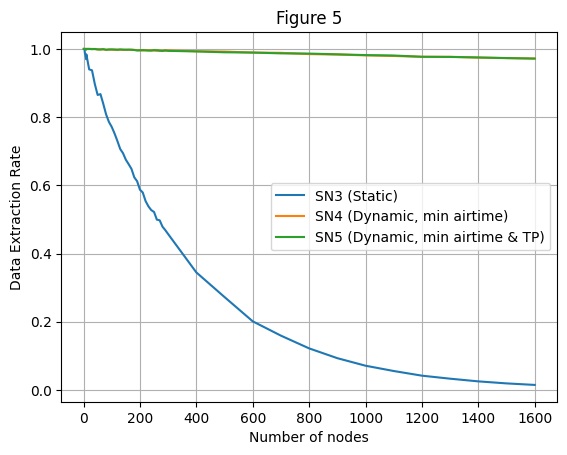

In [15]:
import matplotlib
import matplotlib.pyplot as plt

# exp4
plt.plot(data4["#nrNodes"], data4["der"], label="SN3 (Static) ")
# exp3
plt.plot(data3["#nrNodes"], data3["der"], label="SN4 (Dynamic, min airtime)")
# exp5
plt.plot(data5["#nrNodes"], data5["der"], label="SN5 (Dynamic, min airtime & TP)")

plt.title("Figure 5")
plt.xlabel("Number of nodes")
plt.ylabel("Data Extraction Rate")
plt.legend()
plt.grid()
plt.show()

**Simulate Figure 7**

In [9]:
sinks = [1, 2, 3, 4, 8, 24]

# simulate figure 7
for n_sinks in sinks:
  print(f"Simulating {n_sinks} sink{'s' if n_sinks>1 else ''}")
  for n_nodes in nodes:
    print(f"[{n_sinks}] - Simulating {n_nodes} nodes")
    simulate_figure_7(n_nodes=n_nodes, tx_rate=tx_rate, exp=0, duration=duration, n_sinks=n_sinks, collisions=1)

Simulating 1 sink
[1] - Simulating 1 nodes
[1] - Simulating 2 nodes
[1] - Simulating 3 nodes
[1] - Simulating 4 nodes
[1] - Simulating 5 nodes
[1] - Simulating 6 nodes
[1] - Simulating 7 nodes
[1] - Simulating 8 nodes
[1] - Simulating 9 nodes
[1] - Simulating 10 nodes
[1] - Simulating 20 nodes
[1] - Simulating 30 nodes
[1] - Simulating 40 nodes
[1] - Simulating 50 nodes
[1] - Simulating 60 nodes
[1] - Simulating 70 nodes
[1] - Simulating 80 nodes
[1] - Simulating 90 nodes
[1] - Simulating 100 nodes
[1] - Simulating 110 nodes
[1] - Simulating 120 nodes
[1] - Simulating 130 nodes
[1] - Simulating 140 nodes
[1] - Simulating 150 nodes
[1] - Simulating 160 nodes
[1] - Simulating 170 nodes
[1] - Simulating 180 nodes
[1] - Simulating 190 nodes
[1] - Simulating 200 nodes
[1] - Simulating 210 nodes
[1] - Simulating 220 nodes
[1] - Simulating 230 nodes
[1] - Simulating 240 nodes
[1] - Simulating 250 nodes
[1] - Simulating 260 nodes
[1] - Simulating 270 nodes
[1] - Simulating 280 nodes
[1] - Simu

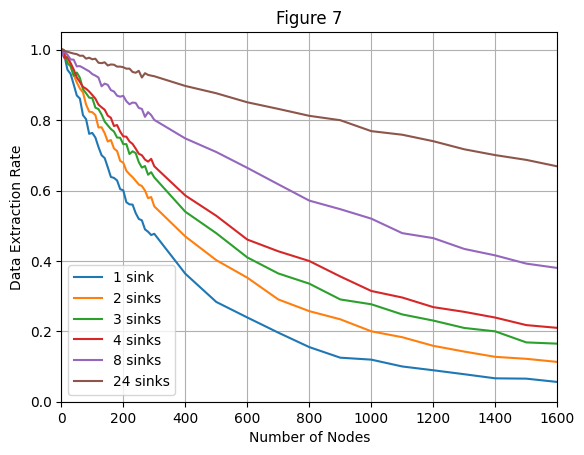

In [10]:
# skiprows and names needed because the output files exp0BSN.dat
# wrongly contain a "#" as the first column, while the real first column is "nrNodes"
data_sink1 = pd.read_csv("exp0BS1.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])
data_sink2 = pd.read_csv("exp0BS2.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])
data_sink3 = pd.read_csv("exp0BS3.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])
data_sink4 = pd.read_csv("exp0BS4.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])
data_sink8 = pd.read_csv("exp0BS8.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])
data_sink24 = pd.read_csv("exp0BS24.dat", sep=" ", skiprows=1, names=["nrNodes", "DER"])

plt.plot(data_sink1["nrNodes"], data_sink1["DER"], label="1 sink")
plt.plot(data_sink2["nrNodes"], data_sink2["DER"], label="2 sinks")
plt.plot(data_sink3["nrNodes"], data_sink3["DER"], label="3 sinks")
plt.plot(data_sink4["nrNodes"], data_sink4["DER"], label="4 sinks")
plt.plot(data_sink8["nrNodes"], data_sink8["DER"], label="8 sinks")
plt.plot(data_sink24["nrNodes"], data_sink24["DER"], label="24 sinks")

plt.title("Figure 7")
plt.xlabel("Number of Nodes")
plt.ylabel("Data Extraction Rate")
plt.ylim(0, 1.05)
plt.xlim(0, 1600)
plt.legend()
plt.grid()
plt.show()